## Footprint size distribution between +BrdU molecules and -BrdU molecules

BrdU calls at ~/brdu/brduCalls/samplename

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import pickle
import os
import csv

hmmPBase = '/wynton/group/goodarzilab/ramanilab/results/pacbio/'
brduPBase = '/wynton/group/goodarzilab/ramanilab/new_rasam/'

sampleRef = pd.concat([pd.read_csv(hmmPBase + '210520_NA_K562Brdu_repeat/210520_NA_K562Brdu_repeat.sampleReference.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '210930_MO_E14_K562_BrdU/210930_MO_E14_K562_BrdU.sampleReference.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '211014_MO_BrdU_invivo/211014_MO_BrdU_invivo.sampleReference.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '220722_BrdUTP_methcontrols/220722_BrdUTP_methcontrols.sampleReference.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '220722_BrdU_K562_invivopulse/220722_BrdU_K562_invivopulse.sampleReference.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '211203_MO_BrdU_invo_1013/211203_MO_BrdU_invo_1013.sampleReference.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '220128_MO_BrdU_shear_CM_spike-in/220128_MO_BrdU_shear_CM_spike-in.sampleReference_MO.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '220920_MO_BrdU_invivo/220920_MO_BrdU_invivo.sampleReference.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '221109_MO_BrdU_invivo/221109_MO_BrdU_invivo.sampleReference.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '20220208_CldU_IdU_invivoSAMOSA/20220208_CldU_IdU_invivoSAMOSA.sampleReference.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '221017_MO_CTCFdegron_RASAM/221017_MO_CTCFdegron_RASAM.sampleReference.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '230419_MO_K562_RASAM_1/230419_MO_K562_RASAM_1.sampleReference.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '230419_MO_K562_RASAM_2/230419_MO_K562_RASAM_2.sampleReference.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '230419_MO_CTCFdegron_RASAM/230419_MO_CTCFdegron_RASAM.sampleReference.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '230419_MO_NIPBLdegron_RASAM/230419_MO_NIPBLdegron_RASAM.sampleReference.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '230425_e14_RASAM_Cell1/230425_e14_RASAM_Cell1.sampleReference.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '230425_e14_RASAM_Cell2/230425_e14_RASAM_Cell2.sampleReference.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '230425_e14_RASAM_Cell3/230425_e14_RASAM_Cell3.sampleReference.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '230425_e14_RASAM_Cell4/230425_e14_RASAM_Cell4.sampleReference.wynton.csv',index_col=0)],
                      ignore_index=True)
sampleRef[50:60]

,cell,sampleName,unalignedSubreadsFile,ccsFile,alignedSubreadsFile,alignedCcsFile,reference,processed
50,211203_MO_BrdU_invo_1013,MO_BrdU_6hr_noM,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...
51,211203_MO_BrdU_invo_1013,MO_BrdU_24hr_m,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...
52,211203_MO_BrdU_invo_1013,MO_BrdU_24hr_noM,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...
53,220128_MO_BrdU_shear_CM_spike-in,negcontrol_m,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...
54,220128_MO_BrdU_shear_CM_spike-in,5minBrdU_m,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...
55,220128_MO_BrdU_shear_CM_spike-in,15minBrdU_m,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...
56,220128_MO_BrdU_shear_CM_spike-in,24hBrdU_m,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...
57,220128_MO_BrdU_shear_CM_spike-in,negcontrol_noM,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...
58,220128_MO_BrdU_shear_CM_spike-in,5minBrdU_noM,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...
59,220128_MO_BrdU_shear_CM_spike-in,15minBrdU_noM,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...


In [2]:
samp_dict = {} # divided by BrdU labeling time points, without degron data
samp_dict['none'] = [53]
samp_dict['five'] = [54,65,72,134,135,146,147,158,159,170,171]
samp_dict['ten'] = [68,75,82,83,106,107,132,133,144,145,156,157,168,169]
samp_dict['fifteen'] = [55,66,73,84,85,108,109,130,131,142,143,154,155,166,167]
samp_dict['oneh'] = [69,76,86,87,110,111,118,121,128,129,140,141,152,153,164,165]
samp_dict['sixh'] = [70,77,126,127,138,139,150,151,162,163]
samp_dict['twelveh'] = [124,125,136,137,148,149,160,161]
samp_dict['oned'] = [56,67,71,74]

print(samp_dict)

{'none': [53], 'five': [54, 65, 72, 134, 135, 146, 147, 158, 159, 170, 171], 'ten': [68, 75, 82, 83, 106, 107, 132, 133, 144, 145, 156, 157, 168, 169], 'fifteen': [55, 66, 73, 84, 85, 108, 109, 130, 131, 142, 143, 154, 155, 166, 167], 'oneh': [69, 76, 86, 87, 110, 111, 118, 121, 128, 129, 140, 141, 152, 153, 164, 165], 'sixh': [70, 77, 126, 127, 138, 139, 150, 151, 162, 163], 'twelveh': [124, 125, 136, 137, 148, 149, 160, 161], 'oned': [56, 67, 71, 74]}


part way done
10,000
100,000
200,000
300,000
done: 53 miss: 72


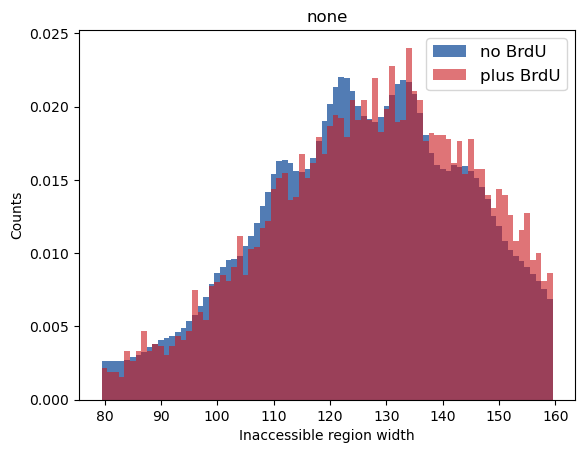

part way done
10,000
100,000
200,000
300,000
done: 54 miss: 75
part way done
10,000
done: 65 miss: 39
part way done
10,000
100,000
200,000
300,000
done: 72 miss: 81
part way done
10,000
100,000
done: 134 miss: 9
part way done
10,000
100,000
200,000
done: 135 miss: 32
part way done
10,000
100,000
done: 146 miss: 7
part way done
10,000
100,000
200,000
done: 147 miss: 30
part way done
10,000
100,000
done: 158 miss: 13
part way done
10,000
100,000
200,000
done: 159 miss: 29
part way done
10,000


KeyboardInterrupt: 

In [7]:
inacc_plus = {}
inacc_minus = {}

for time in samp_dict.keys():
    hmm_plus = []
    hmm_minus = []
    for samp in samp_dict[time]: 
        miss = 0
        # read in prediction file from assembler4 modeling
        with open(brduPBase + 'brduPrediction/{0}_{1}_brdu_220919_s1_cnn2_t2_adj.pickle'.format(sampleRef['cell'][samp],
                                                                                            sampleRef['sampleName'][samp]), 'rb') as p_fin:
            preds = pickle.load(p_fin)

        HMMout = {}

        # read in HMMv2 outfiles
        zmw_curr = 0
        with open(brduPBase + 'inaccessibleRegions/{0}_{1}_inacRegions.csv'.format(sampleRef['cell'][samp],
                                                                                   sampleRef['sampleName'][samp])) as csvfile:
            i = 0
            lengths = []
            reader = csv.reader(csvfile)
            for row in reader:
                if i == 0: # skip the header
                    i += 1
                else:
                    if zmw_curr == 0:
                        zmw_curr = int(row[1])
                    elif int(row[1]) == zmw_curr:
                        lengths.append(int(row[2]))
                    elif int(row[1]) != zmw_curr:
                        HMMout[zmw_curr] = lengths
                        zmw_curr = int(int(row[1]))
                        lengths = [int(row[2])]

        inacc = HMMout
        print('inacRegions read')
        idx = 0
        for zmw in preds.keys():
            if idx == 10000:
                print('10,000')
            if idx == 100000:
                print('100,000')
            if idx == 200000:
                print('200,000')
            if idx == 300000:
                print('300,000')
            try:
                i_tmp = inacc[zmw]
#                 print(i_tmp)
            except KeyError:
                miss += 1
                continue
            bur = preds[zmw] > 0.85
            if np.nanmean(bur) > 0.3: # thresholding at 0.3
                hmm_plus = np.append(hmm_plus,inacc[zmw])
            else:
                hmm_minus = np.append(hmm_minus,inacc[zmw])
            idx+=1
        print('done: ' + str(samp) + ' miss: ' + str(miss))
    inacc_plus[samp] = hmm_plus
    inacc_minus[samp] = hmm_minus

#     plt.hist(inacc_minus, bins=np.arange(79.5,160.5,1),density = True,color='#084594',alpha = 0.7)
#     plt.hist(inacc_plus, bins=np.arange(79.5,160.5,1),density = True,color='#cb181d',alpha = 0.6)
#     plt.xlabel('Inaccessible region width')
#     plt.ylabel('Counts')
#     plt.title(str(time))
#     plt.legend(['no BrdU', 'plus BrdU'],fontsize = 'large')
#     plt.show()
    

# Plotting by time

In [6]:
none = [53]
five = [54,65,72,134,135,146,147,158,159,170,171]
ten = [68,75,82,83,106,107,132,133,144,145,156,157,168,169]
fifteen = [55,66,73,84,85,108,109,130,131,142,143,154,155,166,167]
oneh = [69,76,86,87,110,111,118,121,128,129,140,141,152,153,164,165]
sixh = [70,77,126,127,138,139,150,151,162,163]
twelveh = [124,125,136,137,148,149,160,161]
oned = [56,67,71,74]


no brdU 258442
plus BrdU 111


Text(0.5, 1.0, 'e14 - no BrdU')

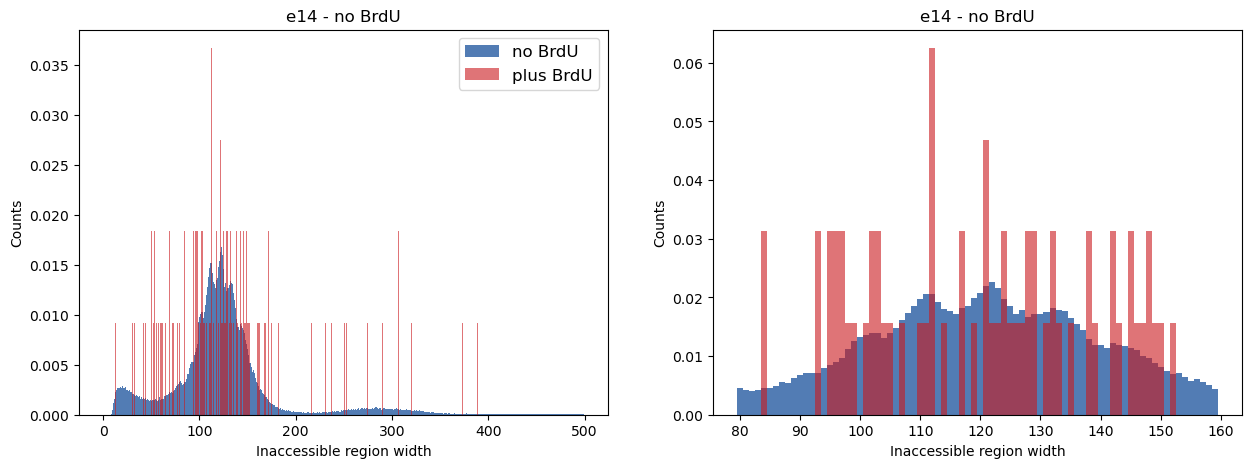

In [7]:
neg = []
pos = []
for samp in none:
    neg.extend(inacc_minus[samp])
    pos.extend(inacc_plus[samp])
    
print('no brdU ' + str(len(neg)))
print('plus BrdU ' + str(len(pos)))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(neg,bins=np.arange(0,500,1),density = True,color='#084594',alpha = 0.7)
ax1.hist(pos,bins=np.arange(0,500,1),density = True,color='#cb181d',alpha = 0.6)
ax1.set_xlabel('Inaccessible region width')
ax1.set_ylabel('Counts')
ax1.set_title('e14 - no BrdU')
ax1.legend(['no BrdU', 'plus BrdU'],fontsize = 'large')

ax2.hist(neg, bins=np.arange(79.5,160.5,1),density = True,color='#084594',alpha = 0.7)
ax2.hist(pos, bins=np.arange(79.5,160.5,1),density = True,color='#cb181d',alpha = 0.6)
ax2.set_xlabel('Inaccessible region width')
ax2.set_ylabel('Counts')
ax2.set_title('e14 - no BrdU')

no brdU 7735505
plus BrdU 27447


Text(0.5, 1.0, 'e14 - 5 minutes BrdU')

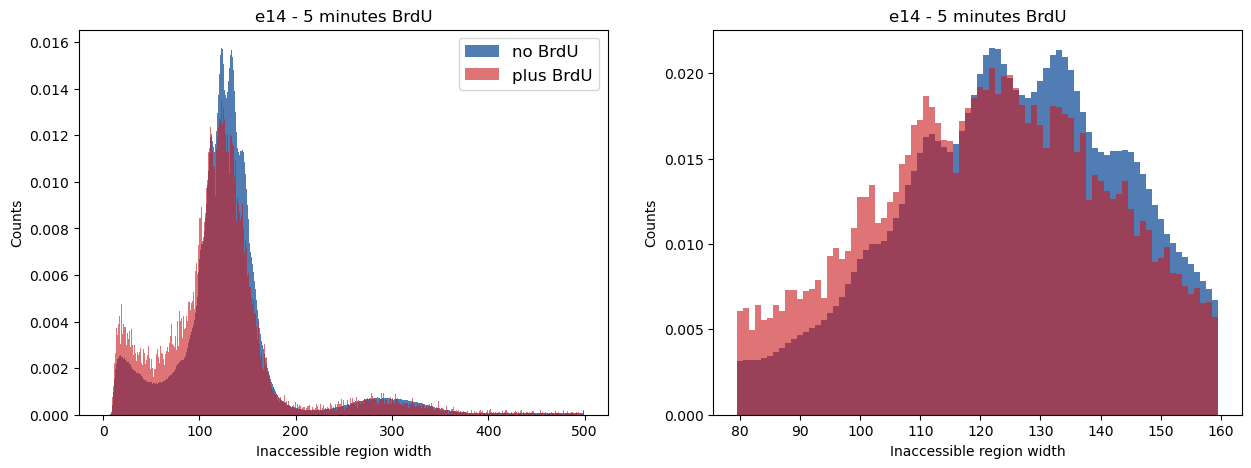

In [8]:
neg = []
pos = []
for samp in five:
    neg.extend(inacc_minus[samp])
    pos.extend(inacc_plus[samp])
    
print('no brdU ' + str(len(neg)))
print('plus BrdU ' + str(len(pos)))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(neg,bins=np.arange(0,500,1),density = True,color='#084594',alpha = 0.7)
ax1.hist(pos,bins=np.arange(0,500,1),density = True,color='#cb181d',alpha = 0.6)
ax1.set_xlabel('Inaccessible region width')
ax1.set_ylabel('Counts')
ax1.set_title('e14 - 5 minutes BrdU')
ax1.legend(['no BrdU', 'plus BrdU'],fontsize = 'large')

ax2.hist(neg, bins=np.arange(79.5,160.5,1),density = True,color='#084594',alpha = 0.7)
ax2.hist(pos, bins=np.arange(79.5,160.5,1),density = True,color='#cb181d',alpha = 0.6)
ax2.set_xlabel('Inaccessible region width')
ax2.set_ylabel('Counts')
ax2.set_title('e14 - 5 minutes BrdU')

no brdU 11587617
plus BrdU 136033


Text(0.5, 1.0, 'e14 - 10 minutes BrdU')

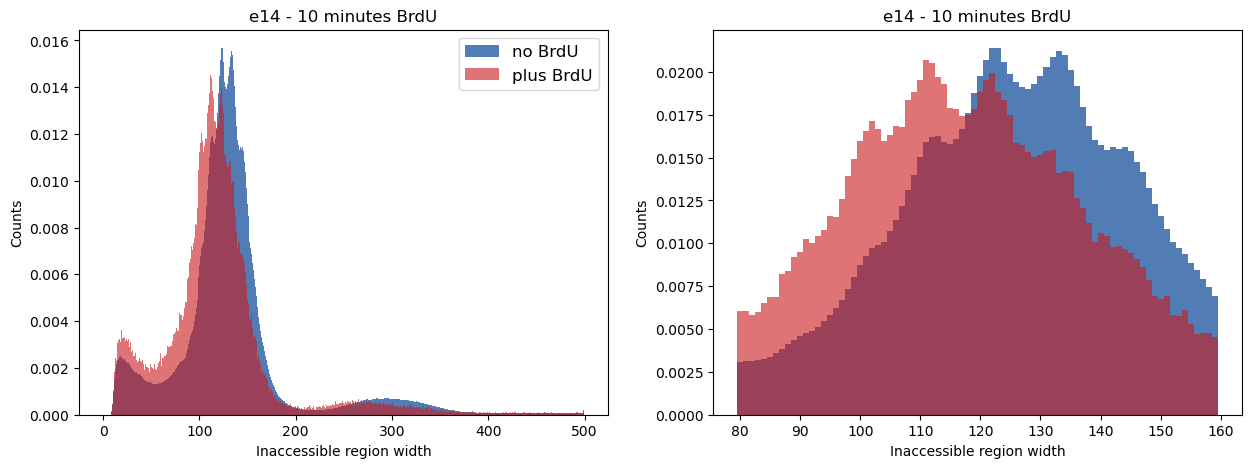

In [9]:
neg = []
pos = []
for samp in ten:
    neg.extend(inacc_minus[samp])
    pos.extend(inacc_plus[samp])
    
print('no brdU ' + str(len(neg)))
print('plus BrdU ' + str(len(pos)))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(neg,bins=np.arange(0,500,1),density = True,color='#084594',alpha = 0.7)
ax1.hist(pos,bins=np.arange(0,500,1),density = True,color='#cb181d',alpha = 0.6)
ax1.set_xlabel('Inaccessible region width')
ax1.set_ylabel('Counts')
ax1.set_title('e14 - 10 minutes BrdU')
ax1.legend(['no BrdU', 'plus BrdU'],fontsize = 'large')

ax2.hist(neg, bins=np.arange(79.5,160.5,1),density = True,color='#084594',alpha = 0.7)
ax2.hist(pos, bins=np.arange(79.5,160.5,1),density = True,color='#cb181d',alpha = 0.6)
ax2.set_xlabel('Inaccessible region width')
ax2.set_ylabel('Counts')
ax2.set_title('e14 - 10 minutes BrdU')

no brdU 9115920
plus BrdU 86678


Text(0.5, 1.0, 'e14 - 15 minutes BrdU')

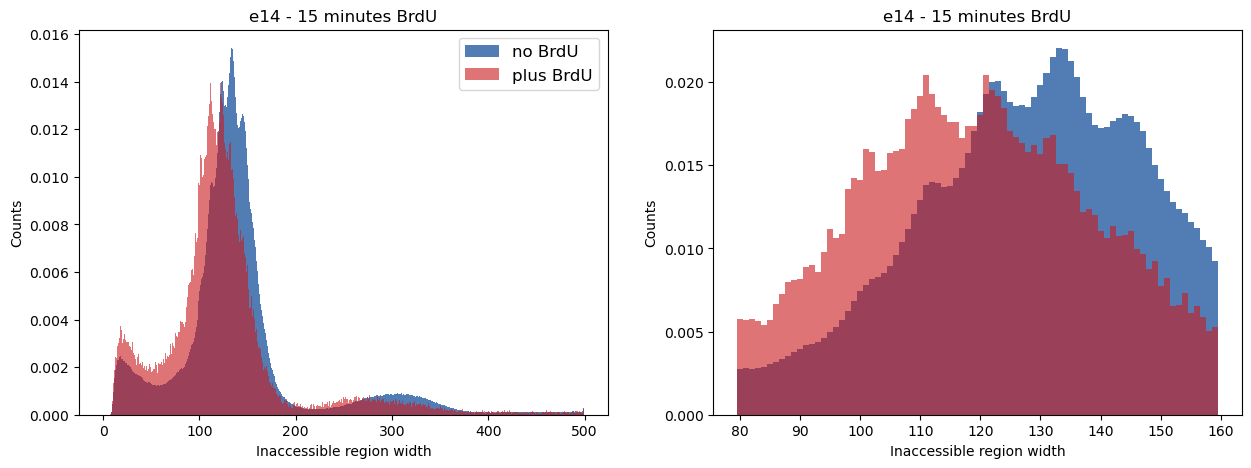

In [10]:
neg = []
pos = []
for samp in fifteen:
    neg.extend(inacc_minus[samp])
    pos.extend(inacc_plus[samp])
    
print('no brdU ' + str(len(neg)))
print('plus BrdU ' + str(len(pos)))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(neg,bins=np.arange(0,500,1),density = True,color='#084594',alpha = 0.7)
ax1.hist(pos,bins=np.arange(0,500,1),density = True,color='#cb181d',alpha = 0.6)
ax1.set_xlabel('Inaccessible region width')
ax1.set_ylabel('Counts')
ax1.set_title('e14 - 15 minutes BrdU')
ax1.legend(['no BrdU', 'plus BrdU'],fontsize = 'large')

ax2.hist(neg, bins=np.arange(79.5,160.5,1),density = True,color='#084594',alpha = 0.7)
ax2.hist(pos, bins=np.arange(79.5,160.5,1),density = True,color='#cb181d',alpha = 0.6)
ax2.set_xlabel('Inaccessible region width')
ax2.set_ylabel('Counts')
ax2.set_title('e14 - 15 minutes BrdU')

no brdU 7367435
plus BrdU 273572


Text(0.5, 1.0, 'e14 - 1 hour BrdU')

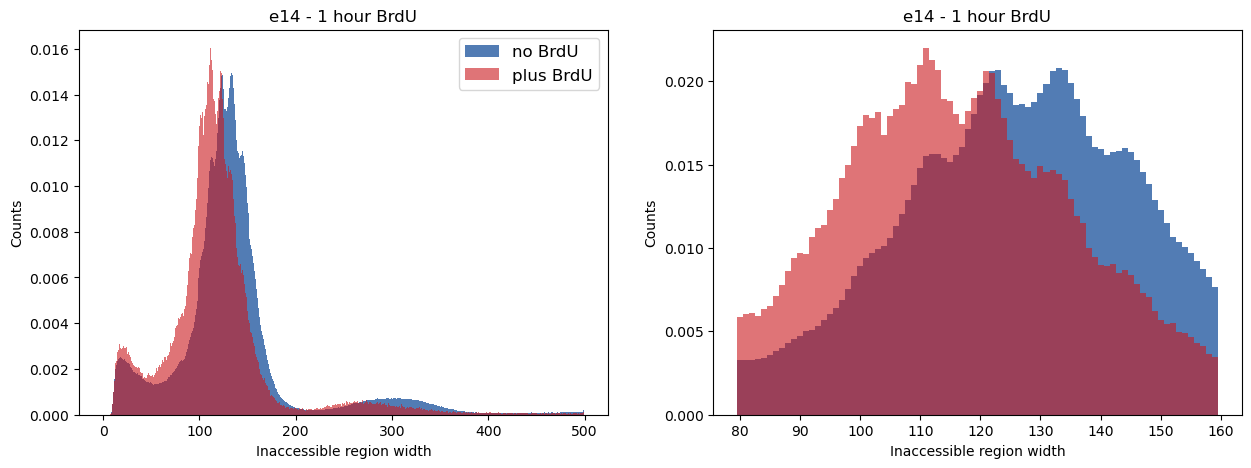

In [11]:
neg = []
pos = []
for samp in oneh:
    neg.extend(inacc_minus[samp])
    pos.extend(inacc_plus[samp])
    
print('no brdU ' + str(len(neg)))
print('plus BrdU ' + str(len(pos)))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(neg,bins=np.arange(0,500,1),density = True,color='#084594',alpha = 0.7)
ax1.hist(pos,bins=np.arange(0,500,1),density = True,color='#cb181d',alpha = 0.6)
ax1.set_xlabel('Inaccessible region width')
ax1.set_ylabel('Counts')
ax1.set_title('e14 - 1 hour BrdU')
ax1.legend(['no BrdU', 'plus BrdU'],fontsize = 'large')

ax2.hist(neg, bins=np.arange(79.5,160.5,1),density = True,color='#084594',alpha = 0.7)
ax2.hist(pos, bins=np.arange(79.5,160.5,1),density = True,color='#cb181d',alpha = 0.6)
ax2.set_xlabel('Inaccessible region width')
ax2.set_ylabel('Counts')
ax2.set_title('e14 - 1 hour BrdU')

no brdU 7974944
plus BrdU 655344


Text(0.5, 1.0, 'e14 - 6 hours BrdU')

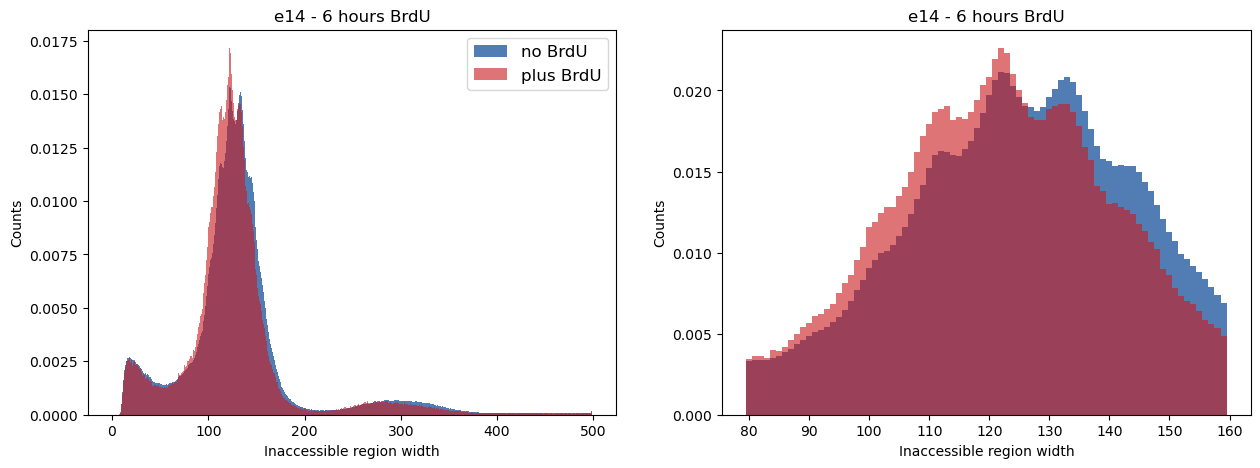

In [12]:
neg = []
pos = []
for samp in sixh:
    neg.extend(inacc_minus[samp])
    pos.extend(inacc_plus[samp])
    
print('no brdU ' + str(len(neg)))
print('plus BrdU ' + str(len(pos)))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(neg,bins=np.arange(0,500,1),density = True,color='#084594',alpha = 0.7)
ax1.hist(pos,bins=np.arange(0,500,1),density = True,color='#cb181d',alpha = 0.6)
ax1.set_xlabel('Inaccessible region width')
ax1.set_ylabel('Counts')
ax1.set_title('e14 - 6 hours BrdU')
ax1.legend(['no BrdU', 'plus BrdU'],fontsize = 'large')

ax2.hist(neg, bins=np.arange(79.5,160.5,1),density = True,color='#084594',alpha = 0.7)
ax2.hist(pos, bins=np.arange(79.5,160.5,1),density = True,color='#cb181d',alpha = 0.6)
ax2.set_xlabel('Inaccessible region width')
ax2.set_ylabel('Counts')
ax2.set_title('e14 - 6 hours BrdU')

no brdU 5853357
plus BrdU 430180


Text(0.5, 1.0, 'e14 - 24 hours BrdU')

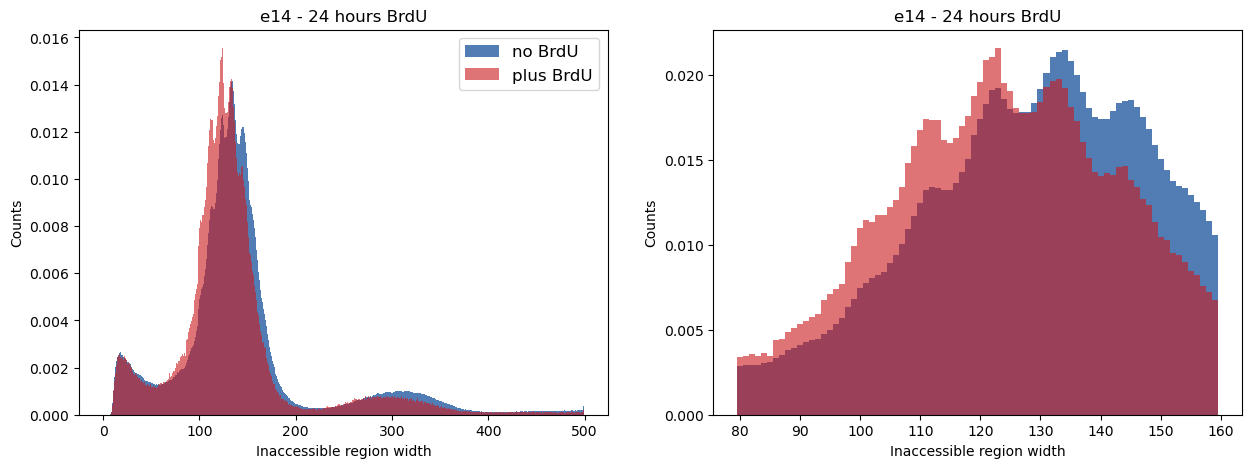

In [13]:
neg = []
pos = []
for samp in oned:
    neg.extend(inacc_minus[samp])
    pos.extend(inacc_plus[samp])
    
print('no brdU ' + str(len(neg)))
print('plus BrdU ' + str(len(pos)))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(neg,bins=np.arange(0,500,1),density = True,color='#084594',alpha = 0.7)
ax1.hist(pos,bins=np.arange(0,500,1),density = True,color='#cb181d',alpha = 0.6)
ax1.set_xlabel('Inaccessible region width')
ax1.set_ylabel('Counts')
ax1.set_title('e14 - 24 hours BrdU')
ax1.legend(['no BrdU', 'plus BrdU'],fontsize = 'large')

ax2.hist(neg, bins=np.arange(79.5,160.5,1),density = True,color='#084594',alpha = 0.7)
ax2.hist(pos, bins=np.arange(79.5,160.5,1),density = True,color='#cb181d',alpha = 0.6)
ax2.set_xlabel('Inaccessible region width')
ax2.set_ylabel('Counts')
ax2.set_title('e14 - 24 hours BrdU')

### K562s

no brdU 7953764
plus BrdU 97565


Text(0.5, 1.0, '10 minutes BrdU')

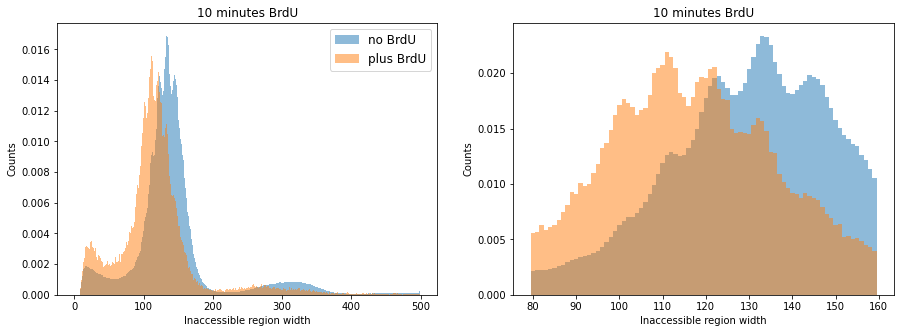

In [27]:
negconone = []
onehour = []
for samp in [38]:
    negconone.extend(minus_inacc_9[samp])
    onehour.extend(plus_inacc_9[samp])
    

print('no brdU ' + str(len(negconone)))
print('plus BrdU ' + str(len(onehour)))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(negconone,bins=np.arange(0,500,1),density = True,alpha = 0.5)
ax1.hist(onehour,bins=np.arange(0,500,1),density = True,alpha = 0.5)
ax1.set_xlabel('Inaccessible region width')
ax1.set_ylabel('Counts')
ax1.set_title('10 minutes BrdU')
ax1.legend(['no BrdU', 'plus BrdU'],fontsize = 'large')

ax2.hist(negconone, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
ax2.hist(onehour, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
ax2.set_xlabel('Inaccessible region width')
ax2.set_ylabel('Counts')
ax2.set_title('10 minutes BrdU')

no brdU 4692497
plus BrdU 621894


Text(0.5, 1.0, '2 hours BrdU')

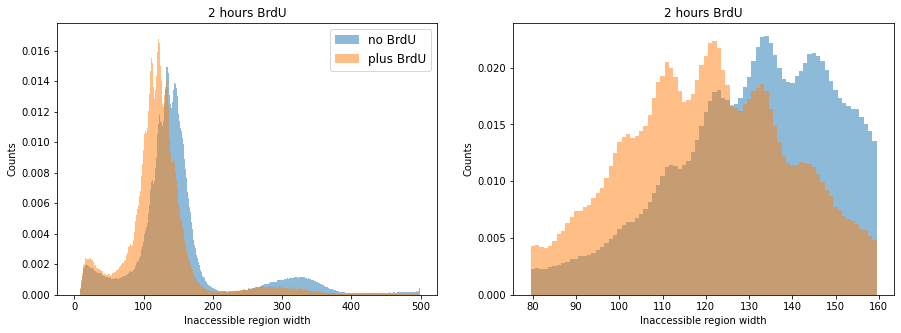

In [29]:
# 2 hours: 37

negconone = []
onehour = []
for samp in [37]:
    negconone.extend(minus_inacc_9[samp])
    onehour.extend(plus_inacc_9[samp])
    

print('no brdU ' + str(len(negconone)))
print('plus BrdU ' + str(len(onehour)))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(negconone,bins=np.arange(0,500,1),density = True,alpha = 0.5)
ax1.hist(onehour,bins=np.arange(0,500,1),density = True,alpha = 0.5)
ax1.set_xlabel('Inaccessible region width')
ax1.set_ylabel('Counts')
ax1.set_title('2 hours BrdU')
ax1.legend(['no BrdU', 'plus BrdU'],fontsize = 'large')

ax2.hist(negconone, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
ax2.hist(onehour, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
ax2.set_xlabel('Inaccessible region width')
ax2.set_ylabel('Counts')
ax2.set_title('2 hours BrdU')

no brdU 771308
plus BrdU 38752


Text(0.5, 1.0, '4 and a half hours BrdU')

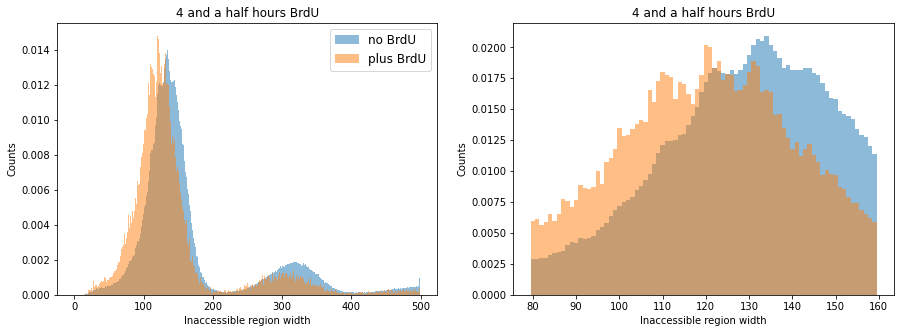

In [31]:
# 4.5 hours: 6,7

negconone = []
onehour = []
for samp in [6,7]:
    negconone.extend(minus_inacc_9[samp])
    onehour.extend(plus_inacc_9[samp])
    

print('no brdU ' + str(len(negconone)))
print('plus BrdU ' + str(len(onehour)))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(negconone,bins=np.arange(0,500,1),density = True,alpha = 0.5)
ax1.hist(onehour,bins=np.arange(0,500,1),density = True,alpha = 0.5)
ax1.set_xlabel('Inaccessible region width')
ax1.set_ylabel('Counts')
ax1.set_title('4 and a half hours BrdU')
ax1.legend(['no BrdU', 'plus BrdU'],fontsize = 'large')

ax2.hist(negconone, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
ax2.hist(onehour, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
ax2.set_xlabel('Inaccessible region width')
ax2.set_ylabel('Counts')
ax2.set_title('4 and a half hours BrdU')

no brdU 2642274
plus BrdU 6460175


Text(0.5, 1.0, '24 hours BrdU')

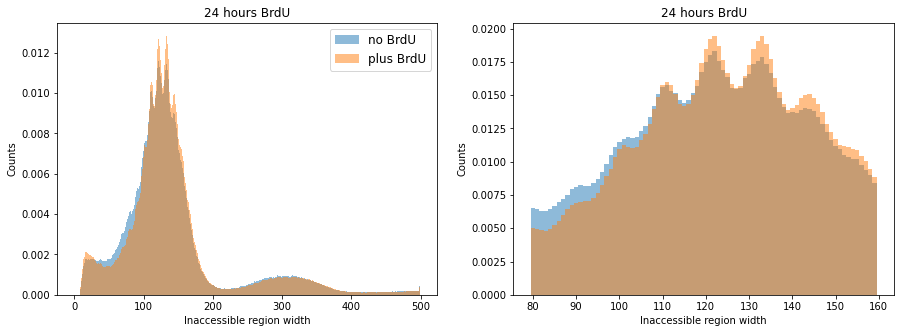

In [33]:
# 24 hours BrdU K562: 10,11,36

negconone = []
onehour = []
for samp in [10,11,36]:
    negconone.extend(minus_inacc_9[samp])
    onehour.extend(plus_inacc_9[samp])
    

print('no brdU ' + str(len(negconone)))
print('plus BrdU ' + str(len(onehour)))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(negconone,bins=np.arange(0,500,1),density = True,alpha = 0.5)
ax1.hist(onehour,bins=np.arange(0,500,1),density = True,alpha = 0.5)
ax1.set_xlabel('Inaccessible region width')
ax1.set_ylabel('Counts')
ax1.set_title('24 hours BrdU')
ax1.legend(['no BrdU', 'plus BrdU'],fontsize = 'large')

ax2.hist(negconone, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
ax2.hist(onehour, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
ax2.set_xlabel('Inaccessible region width')
ax2.set_ylabel('Counts')
ax2.set_title('24 hours BrdU')

### CTCF-degron

* treated:
    * 10 min: 88,89
    * 15 min: 90,91
    * 1 hr: 92,93
* Untreated
    * 10 min: 82,83
    * 15 min: 84,85
    * 1 hr: 86,87

treated no brdU 763387
treated plus BrdU 283505
untreated no brdU 803983
untreated plus BrdU 242607


Text(0.5, 1.0, '10 minutes BrdU')

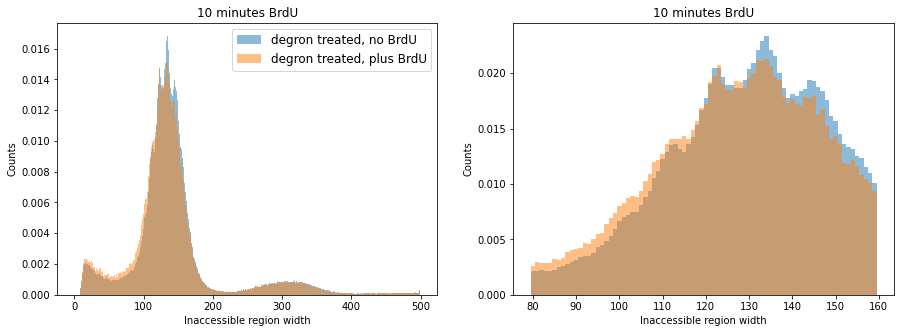

In [177]:
# CTCF-degron 10 min
# treated: 88,89
# untreated: 82,83

treated_minus = []
treated_plus = []
untreated_minus = []
untreated_plus = []

for samp in [88,89]: # treated samples
    treated_minus.extend(minus_inacc[samp])
    treated_plus.extend(plus_inacc[samp])
for samp in [82,83]: # untreated samples
    untreated_minus.extend(minus_inacc[samp])
    untreated_plus.extend(plus_inacc[samp])    
    

print('treated no brdU ' + str(len(treated_minus)))
print('treated plus BrdU ' + str(len(treated_plus)))
print('untreated no brdU ' + str(len(untreated_minus)))
print('untreated plus BrdU ' + str(len(untreated_plus)))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(treated_minus,bins=np.arange(0,500,1),density = True,alpha = 0.5)
ax1.hist(treated_plus,bins=np.arange(0,500,1),density = True,alpha = 0.5)
# ax1.hist(untreated_minus,bins=np.arange(0,500,1),density = True,alpha = 0.5)
# ax1.hist(untreated_plus,bins=np.arange(0,500,1),density = True,alpha = 0.5)
ax1.set_xlabel('Inaccessible region width')
ax1.set_ylabel('Counts')
ax1.set_title('10 minutes BrdU')
# ax1.legend(['degron treated, no BrdU', 'degron treated, plus BrdU','untreated, no BrdU','untreated, plus BrdU'])
ax1.legend(['degron treated, no BrdU', 'degron treated, plus BrdU'], fontsize = 'large')

ax2.hist(treated_minus, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
ax2.hist(treated_plus, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
# ax2.hist(untreated_minus, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
# ax2.hist(untreated_plus, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
ax2.set_xlabel('Inaccessible region width')
ax2.set_ylabel('Counts')
ax2.set_title('10 minutes BrdU')

treated no brdU 803085
treated plus BrdU 320738
untreated no brdU 724016
untreated plus BrdU 219528


Text(0.5, 1.0, '15 minutes BrdU')

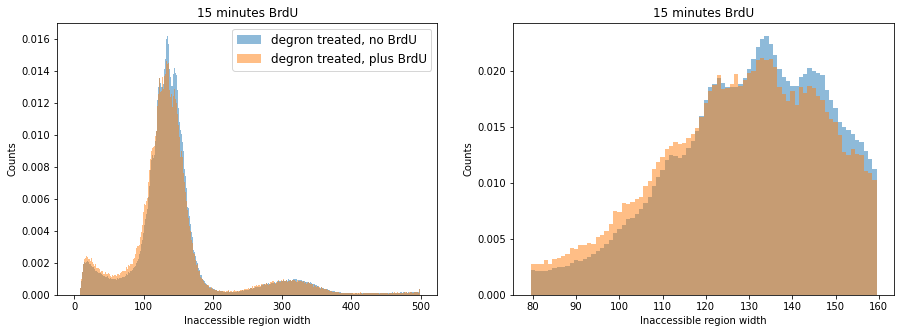

In [178]:
# CTCF-degron 15 min
# treated: 90,91
# untreated: 84,85

treated_minus = []
treated_plus = []
untreated_minus = []
untreated_plus = []

for samp in [90,91]: # treated samples
    treated_minus.extend(minus_inacc[samp])
    treated_plus.extend(plus_inacc[samp])
for samp in [84,85]: # untreated samples
    untreated_minus.extend(minus_inacc[samp])
    untreated_plus.extend(plus_inacc[samp])    
    

print('treated no brdU ' + str(len(treated_minus)))
print('treated plus BrdU ' + str(len(treated_plus)))
print('untreated no brdU ' + str(len(untreated_minus)))
print('untreated plus BrdU ' + str(len(untreated_plus)))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(treated_minus,bins=np.arange(0,500,1),density = True,alpha = 0.5)
ax1.hist(treated_plus,bins=np.arange(0,500,1),density = True,alpha = 0.5)
# ax1.hist(untreated_minus,bins=np.arange(0,500,1),density = True,alpha = 0.5)
# ax1.hist(untreated_plus,bins=np.arange(0,500,1),density = True,alpha = 0.5)
ax1.set_xlabel('Inaccessible region width')
ax1.set_ylabel('Counts')
ax1.set_title('15 minutes BrdU')
# ax1.legend(['degron treated, no BrdU', 'degron treated, plus BrdU','untreated, no BrdU','untreated, plus BrdU'])
ax1.legend(['degron treated, no BrdU', 'degron treated, plus BrdU'], fontsize = 'large')

ax2.hist(treated_minus, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
ax2.hist(treated_plus, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
# ax2.hist(untreated_minus, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
# ax2.hist(untreated_plus, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
ax2.set_xlabel('Inaccessible region width')
ax2.set_ylabel('Counts')
ax2.set_title('15 minutes BrdU')

treated no brdU 694948
treated plus BrdU 362880
untreated no brdU 834051
untreated plus BrdU 297625


Text(0.5, 1.0, '1 hour BrdU')

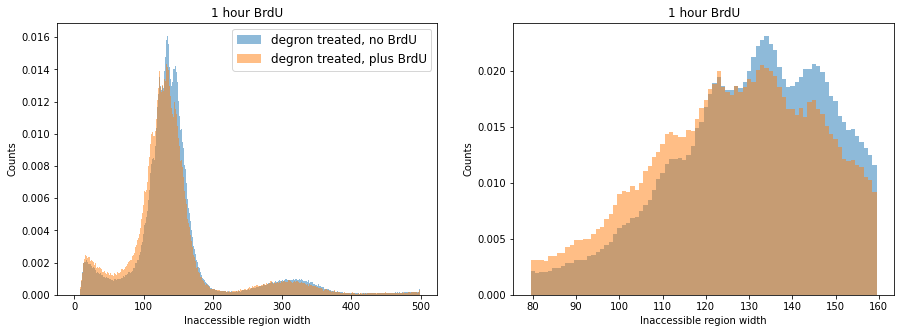

In [179]:
# CTCF-degron 1 hour
# treated: 92,93
# untreated: 86,87

treated_minus = []
treated_plus = []
untreated_minus = []
untreated_plus = []

for samp in [92,93]: # treated samples
    treated_minus.extend(minus_inacc[samp])
    treated_plus.extend(plus_inacc[samp])
for samp in [86,87]: # untreated samples
    untreated_minus.extend(minus_inacc[samp])
    untreated_plus.extend(plus_inacc[samp])    
    

print('treated no brdU ' + str(len(treated_minus)))
print('treated plus BrdU ' + str(len(treated_plus)))
print('untreated no brdU ' + str(len(untreated_minus)))
print('untreated plus BrdU ' + str(len(untreated_plus)))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(treated_minus,bins=np.arange(0,500,1),density = True,alpha = 0.5)
ax1.hist(treated_plus,bins=np.arange(0,500,1),density = True,alpha = 0.5)
# ax1.hist(untreated_minus,bins=np.arange(0,500,1),density = True,alpha = 0.5)
# ax1.hist(untreated_plus,bins=np.arange(0,500,1),density = True,alpha = 0.5)
ax1.set_xlabel('Inaccessible region width')
ax1.set_ylabel('Counts')
ax1.set_title('1 hour BrdU')
# ax1.legend(['degron treated, no BrdU', 'degron treated, plus BrdU','untreated, no BrdU','untreated, plus BrdU'])
ax1.legend(['degron treated, no BrdU', 'degron treated, plus BrdU'], fontsize = 'large')

ax2.hist(treated_minus, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
ax2.hist(treated_plus, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
# ax2.hist(untreated_minus, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
# ax2.hist(untreated_plus, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
ax2.set_xlabel('Inaccessible region width')
ax2.set_ylabel('Counts')
ax2.set_title('1 hour BrdU')

# Percentage of reads called as + BrdU and - BrdU

In [6]:
usesamples = [0,2,3,6,7,8,10,11,14,15,16,17,19,20,21,22,23,24,25,26,27,28,29,30,31,35,36,37,
              38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,65,66,67,68,69,70,71,72,
              73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93] # all samples as of 01/07/23


perc_plus = {}
perc_minus = {}
readsn = {}

perc_plus_arr = []
perc_minus_arr = []

for samp in usesamples:
    num_plus = len(plus_inacc[samp])
    num_minus = len(minus_inacc[samp])
    total = num_plus + num_minus

    perc_plus[samp] = num_plus/total * 100
    perc_minus[samp] = num_minus/total * 100
    
    perc_plus_arr.append(num_plus/total * 100)
    perc_minus_arr.append(num_minus/total * 100)
    readsn[samp] = total
    

# print(perc_plus)
# print(perc_minus)

print(readsn)


{0: 32146, 2: 22000, 3: 19437, 6: 23645, 7: 65605, 8: 67132, 10: 100507, 11: 91474, 14: 568954, 15: 278292, 16: 876921, 17: 270995, 19: 30519, 20: 25414, 21: 31668, 22: 24437, 23: 28565, 24: 25326, 25: 22661, 26: 27115, 27: 15634, 28: 29477, 29: 156822, 30: 158106, 31: 97248, 35: 229296, 36: 297855, 37: 214651, 38: 304180, 39: 253390, 40: 319563, 41: 218315, 42: 244858, 43: 596, 44: 779, 45: 1557, 46: 30, 47: 80239, 48: 365, 49: 708, 50: 3463, 51: 241, 52: 4, 53: 323149, 54: 334605, 55: 457501, 56: 293696, 57: 306308, 58: 312353, 59: 367066, 60: 346943, 65: 67867, 66: 62014, 67: 50566, 68: 38742, 69: 26732, 70: 36755, 71: 38885, 72: 358310, 73: 341148, 74: 275354, 75: 280893, 76: 149777, 77: 249270, 78: 391164, 79: 362716, 80: 423052, 81: 336132, 82: 25313, 83: 24621, 84: 26302, 85: 18516, 86: 23498, 87: 31018, 88: 17073, 89: 18706, 90: 16074, 91: 20670, 92: 14633, 93: 18921}


In [7]:
# make a dictionary of sample types and indices

stdict = {}

stdict['no_brdu_e14'] = [19,43,53]
stdict['no_brdu_k562'] = [2,3,35]
stdict['ten_min_brdu_e14'] = [21,45,68,75,82,83]
stdict['ten_min_brdu_k562'] = [38]
stdict['twentyfour_h_brdu_e14'] = [27,51,56,67,71,74]
stdict['twentyfour_h_brdu_k562'] = [10,11,36]

stdict['five_min_brdu_e14'] = [54,65,72]
stdict['fifteen_min_brdu_e14'] = [55,66,73,84,85]
stdict['one_h_brdu_e14'] = [23,47,69,76,86,87]
stdict['six_h_brdu_e14'] = [25,49,70,77]

stdict['two_h_brdu_k562'] = [37]
stdict['four_half_h_brdu_k562'] = [6,7]

stdict['twentyfour_h_cldu'] = [78,80]
stdict['twentyfour_h_idu'] = [79,81]

print(stdict)

{'no_brdu_e14': [19, 43, 53], 'no_brdu_k562': [2, 3, 35], 'ten_min_brdu_e14': [21, 45, 68, 75, 82, 83], 'ten_min_brdu_k562': [38], 'twentyfour_h_brdu_e14': [27, 51, 56, 67, 71, 74], 'twentyfour_h_brdu_k562': [10, 11, 36], 'five_min_brdu_e14': [54, 65, 72], 'fifteen_min_brdu_e14': [55, 66, 73, 84, 85], 'one_h_brdu_e14': [23, 47, 69, 76, 86, 87], 'six_h_brdu_e14': [25, 49, 70, 77], 'two_h_brdu_k562': [37], 'four_half_h_brdu_k562': [6, 7], 'twentyfour_h_cldu': [78, 80], 'twentyfour_h_idu': [79, 81]}


In [8]:
for samp in [19,43,53]:
    print(perc_plus[samp])
    print(readsn[samp])

0.03276647334447393
30519
0.5033557046979865
596
0.164320483739699
323149


In [5]:
# weighting averages by number of reads
frac_all = {}
for st in stdict:
    top = len(stdict[st])
    numer = 0
    denom = 0

    for i in range(0,top):
        sn = stdict[st][i]
        numer += perc_plus[sn]*readsn[sn]
        denom += readsn[sn]
#     frac = numer / ((i+1) * denom)
    frac = numer / denom
    frac_all[st] = frac
print(frac_all)

{'no_brdu_e14': 11.858670370119459, 'no_brdu_k562': 15.415187657212087, 'ten_min_brdu_e14': 18.17703342155047, 'ten_min_brdu_k562': 19.061082253928596, 'twentyfour_h_brdu_e14': 53.178345611350345, 'twentyfour_h_brdu_k562': 93.2812206534432, 'five_min_brdu_e14': 12.516857654360908, 'fifteen_min_brdu_e14': 13.670634723423241, 'one_h_brdu_e14': 24.28162399324366, 'six_h_brdu_e14': 51.3154747668022, 'two_h_brdu_k562': 29.613186055504045, 'four_half_h_brdu_k562': 10.434733893557423, 'twentyfour_h_cldu': 56.40137260874264, 'twentyfour_h_idu': 63.73889601172215}


Text(0.5, 1.0, 'e14 and K562')

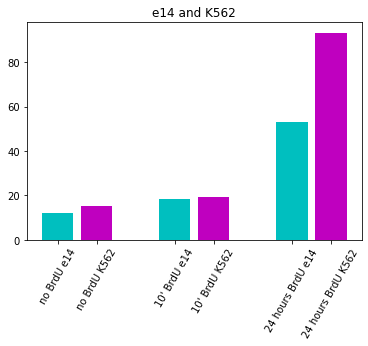

In [6]:
# weighting averages by number of reads
test = [frac_all['no_brdu_e14'],frac_all['no_brdu_k562'],frac_all['ten_min_brdu_e14'],
        frac_all['ten_min_brdu_k562'],frac_all['twentyfour_h_brdu_e14'],frac_all['twentyfour_h_brdu_k562']]

plt.bar([0,1,3,4,6,7],test, color = ['c','m','c','m','c','m'])
# plt.ylim([0,2])
plt.xticks(ticks = [0,1,3,4,6,7], 
           labels = ['no BrdU e14', 'no BrdU K562', "10' BrdU e14", "10' BrdU K562",'24 hours BrdU e14','24 hours BrdU K562'],
          rotation = 60)
plt.title('e14 and K562')

Text(0.5, 1.0, 'e14')

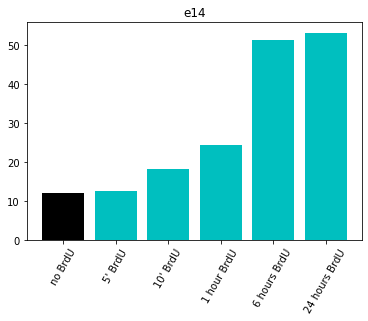

In [7]:
# weighting averages by number of reads
e14s = [frac_all['no_brdu_e14'],frac_all['five_min_brdu_e14'],frac_all['ten_min_brdu_e14'],
        frac_all['one_h_brdu_e14'],frac_all['six_h_brdu_e14'],frac_all['twentyfour_h_brdu_e14']]

plt.bar([0,1,2,3,4,5],e14s, color = ['k','c','c','c','c','c'])
# plt.ylim([0,1])
plt.xticks(ticks = [0,1,2,3,4,5], 
           labels = ['no BrdU', "5' BrdU", "10' BrdU", '1 hour BrdU', '6 hours BrdU','24 hours BrdU'],
          rotation = 60)
plt.title('e14')

Text(0.5, 1.0, 'K562')

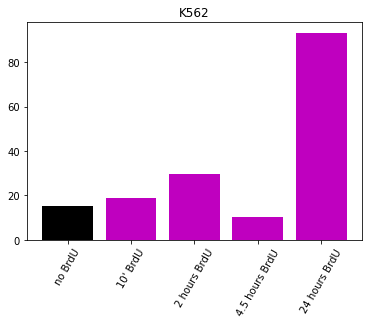

In [8]:
# weighting averages by number of reads
k562s = [frac_all['no_brdu_k562'],frac_all['ten_min_brdu_k562'],frac_all['two_h_brdu_k562'],
        frac_all['four_half_h_brdu_k562'],frac_all['twentyfour_h_brdu_k562']]

plt.bar([0,1,2,3,4],k562s, color = ['k','m','m','m','m'])
plt.xticks(ticks = [0,1,2,3,4], 
           labels = ['no BrdU',"10' BrdU", '2 hours BrdU', '4.5 hours BrdU','24 hours BrdU'],
          rotation = 60)
plt.title('K562')

Text(0.5, 1.0, 'Nucleotide analog comparison')

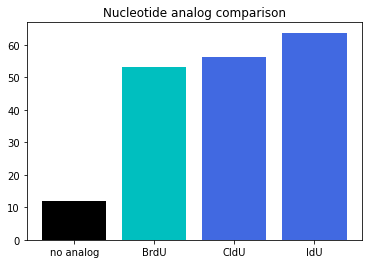

In [9]:
# weighting averages by number of reads
clduidu = [frac_all['no_brdu_e14'],frac_all['twentyfour_h_brdu_e14'],frac_all['twentyfour_h_cldu'],
        frac_all['twentyfour_h_idu']]

plt.bar([0,1,2,3],clduidu, color = ['k','c','royalblue','royalblue'])
plt.xticks(ticks = [0,1,2,3,], 
           labels = ['no analog', "BrdU", "CldU", 'IdU'])
plt.title('Nucleotide analog comparison')